- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
    - Airplanes
    - Cars
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications.
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32).
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

# Import Libraries and Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# the shape of the data for X
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
# the shape of the data for y
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

# Visualize the Data

[3]


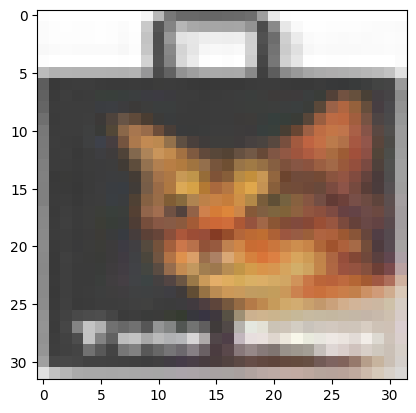

In [ ]:
# plotting an image from the datasets
i = 3000
plt.imshow(X_train[i])
print(y_train[i])

In [ ]:
# viewing the images in the datasets
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize= (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [ ]:
print(n_training)

50000


# Data Preparation

In [ ]:
# changing data type so that data can be normalized later
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
number_cat = 10

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test, number_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
# perform normalization so that value ranges from 0 to 1
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

# Train the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
# building the neural network
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# 1. Using Adam optimizer
optimizer = Adam(learning_rate=0.001)

# Compile model with the new optimizer
cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 2. Learning Rate Scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [ ]:
# cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
# history = cnn_model.fit(X_train, y_train, batch_size = 100, epochs = 20, shuffle = True)
history = cnn_model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        batch_size=100,
                        epochs=20,
                        shuffle=True,
                        callbacks=[reduce_lr])

Epoch 1/20
500/500 [==============================] - 491s 976ms/step - loss: 1.6031 - accuracy: 0.4094 - val_loss: 1.2068 - val_accuracy: 0.5636 - lr: 0.0010
Epoch 2/20
500/500 [==============================] - 480s 960ms/step - loss: 1.1589 - accuracy: 0.5865 - val_loss: 1.0303 - val_accuracy: 0.6330 - lr: 0.0010
Epoch 3/20
500/500 [==============================] - 486s 973ms/step - loss: 0.9666 - accuracy: 0.6575 - val_loss: 0.9145 - val_accuracy: 0.6787 - lr: 0.0010
Epoch 4/20
500/500 [==============================] - 503s 1s/step - loss: 0.8338 - accuracy: 0.7058 - val_loss: 0.7850 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 5/20
500/500 [==============================] - 477s 953ms/step - loss: 0.7352 - accuracy: 0.7426 - val_loss: 0.7082 - val_accuracy: 0.7542 - lr: 0.0010
Epoch 6/20
500/500 [==============================] - 471s 943ms/step - loss: 0.6725 - accuracy: 0.7643 - val_loss: 0.6897 - val_accuracy: 0.7583 - lr: 0.0010
Epoch 7/20
500/500 [=============================

# Evaluate the Model

In [ ]:
# testing the predictive model
evaluation = cnn_model.evaluate(X_test, y_test, batch_size = 100)
print('Test Accuracy: {}'.format(evaluation[1]))

100/100 [==============================] - 23s 232ms/step - loss: 0.7489 - accuracy: 0.8034
Test Accuracy: 0.8033999800682068


In [ ]:
predicted_probs = cnn_model.predict(X_test, batch_size = 1)
predicted_classes = np.argmax(predicted_probs, axis=1)
predicted_classes

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test = y_test.argmax(1)
y_test

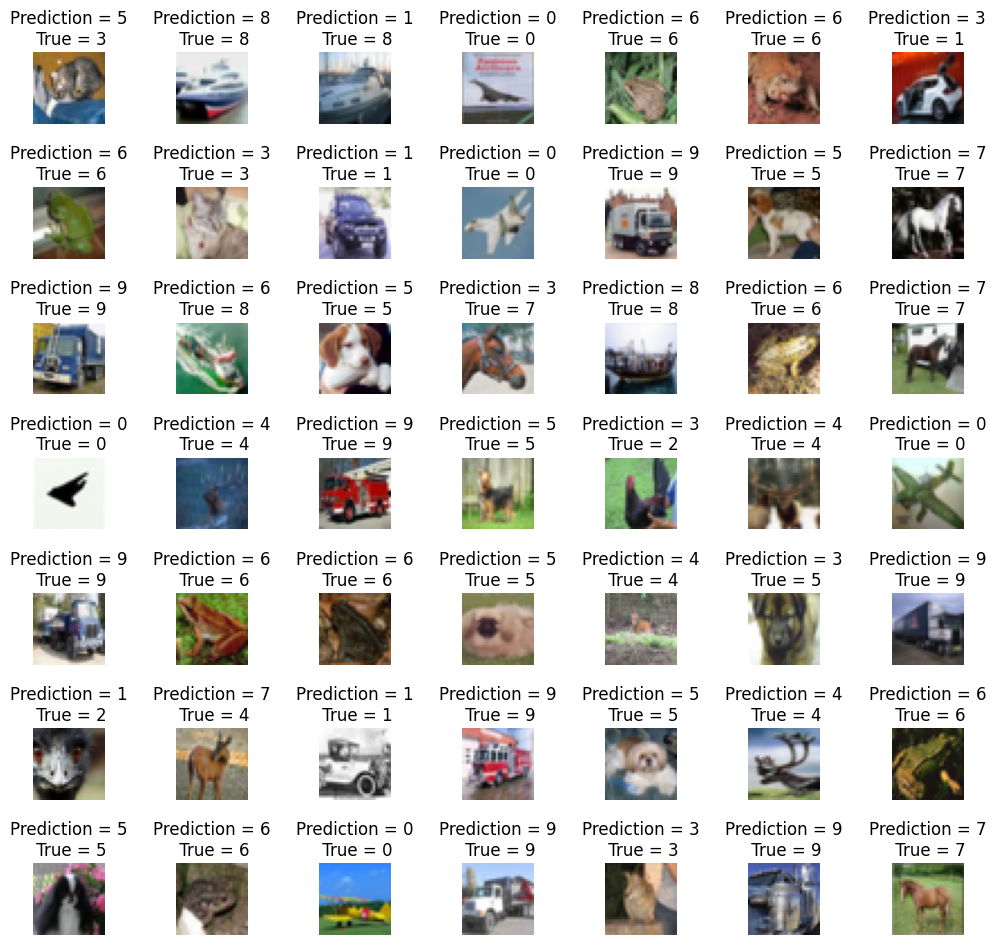

In [ ]:
# plotting the images and also included with the prediction and actual
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

In [ ]:
# plotting confusion matrix for the model
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# Save the Model

In [ ]:
import os

# Directory setup
directory = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)

# Save the model
model_path = os.path.join(directory, 'keras_cifar10_trained_model.keras')
cnn_model.save(model_path)
